In [575]:
import pandas as pd
import numpy as np

In [576]:
from collections import Counter

In [577]:
tot_ji = pd.read_csv('./tot_jisu_adfn_2.csv', sep='|', encoding = 'utf-8')

In [578]:
tot_ji

,magazine,brand,title,contents,word_jisu,ADFN,ADFN_2,ADFN_3
0,Allure,Ji,"화제의 더듬이 머리, 지금과 옛날의 다른 점은?","[""['블랙핑크 지수도, 레드벨벳 아이린도, 이효리도, 선미도 했다! 앞머리 두가닥...","['블랙핑크 지수도', '레드벨벳 아이린도', '이효리도', '선미도 했다 앞머리 ...","['BLACKPINK', '지수', '도', ""',"", ""'"", '레드', '벨벳'...","['BLACKPINK', '지수', '레드', '벨벳', '이효리', '가닥', '...","['BLACKPINK', '지수', '레드', '벨벳', '이효리', '가닥', '..."
1,Allure,Ji,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,"[""['32시간만에 1억뷰 돌파! 블랙핑크의 ‘How you like that’ 뮤...",['32시간만에 1억뷰 돌파 블랙핑크의 How you like that 뮤직비디오 ...,"['32시간', '만에', '1억', '뷰', '돌파', 'BLACKPINK', '...","['뷰', '돌파', 'BLACKPINK', 'How', 'you', 'like',...","['뷰', '돌파', 'BLACKPINK', 'How', 'like', 'that'..."
2,Allure,Ji,#얼루어_커버걸 블랙핑크 지수,"[""['광고"", ' 얼루어 2월호 커버의 주인공 블랙핑크 지수!', '온스타일 ‘...","['광고', ' 얼루어 2월호 커버의 주인공 블랙핑크 지수', '온스타일 퍼펙트 ...","['광고', ""',"", ""'"", '얼루어', '2월', '호', '커버', '의',...","['광고', '얼루어', '호', '주인공', 'BLACKPINK', '지수', '...","['얼루어', '호', '주인공', 'BLACKPINK', '지수', '온스타일',..."
3,Allure,Ji,LOOK AT ME,"[""['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다. <...",['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다 <퍼펙트...,"['얼루어', '코리아', '>', '의', '커버', '모델', '이', '된',...","['얼루어', '코리아', '모델', 'BLACKPINK', '지수', '특별한',...","['얼루어', '코리아', '모델', 'BLACKPINK', '지수', '특별한',..."
4,Allure,Ji,"얼루어 2018년 2월호 커버 (블랙핑크 지수, 민스코)","[""['광고"", ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를...","['광고', ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를 장...","['광고', ""',"", ""'"", '걸그룹', 'BLACKPINK', '의', '멤버...","['광고', '걸그룹', 'BLACKPINK', '지수', '얼루어', '코리아',...","['걸그룹', 'BLACKPINK', '지수', '얼루어', '코리아', '호', ..."
...,...,...,...,...,...,...,...,...
153,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ..."
154,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ..."
155,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ...","['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'..."
156,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,"['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 🤟', 'BLA...",['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '..."


In [579]:
for word in tot_ji['word_jisu']:
    if '움' in word:
        print(word)
        print('-'*50)

['32시간만에 1억뷰 돌파 블랙핑크의 How you like that 뮤직비디오 여기에 숨겨진 메이크업 디테일이 가득하다는 사실 알고 있나요 블랙핑크 메이크업 담당 우선 이명선 원장이 한프레임', '한 프레임 놓치기 쉬운 디테일을 모두 알려주었습니다', '광고', 'Q 이번 뮤직비디오 메이크업 룩의 메인 컨셉은 무엇인가요', '강렬함', '오리엔탈적인', '그리고 블랙핑크의 블랙스러움', '의상이나 헤어 그리고 무대 세트에서 컬러가 많이 들어가고 화려했기 때문에 메이크업에서는 컬러 포인트를 최대한 빼고 진행을 했어요 그래서 제니의 눈물 글리터나 커다란 비즈 등 크고 무거운 포인트를 하나만 주고 점이나 선', '형태에 집중한 메이크업 룩을 완성했던 것 같아요', 'Q 화제의 한복씬의 지수 점 메이크업은 누구 아이디어였나요', '사실 이건 지수 본인의 아이디어예요 뮤직비디오 메이크업 아이디어라기 보단 티저 촬영할 때 한 메이크업인데 너무 마음에 들어해서 이게 꼭 뮤직비디오에도 들어갔으면 좋겠다고 하더라고요 그래서 어디에 넣으면 좋을지 찾다가 한복과 무드가 맞을 거 같아 적용했어요 한복이 워낙에 화려해서 좀 밋밋해보이면 어쩌나 고민했는데 생각보다 더 예쁘고 포인트 있게 나왔어요', 'Q 그 외 한복씬 메이크업의 디테일이 있다면', '뮤비에서 잘 안보이긴 하는데', '로제씨 군무씬이나 살짝살짝 지나가는 모습을 보면 눈 밑에 오묘하게 빛나는 무언가 빛나요 이게 눈 밑에 가느다란 실버 실 같은 걸로 속눈썹을 만들어서 붙인 건데 글리터를 붙이는 것보다 더 은은하고 묘하게 반짝여서 매우 마음에 들었습니다', 'Q 제니의 눈 양 옆에 달린 큐빅 메이크업은 어떻게 연출했나요', '원래 푸른 큐빅이 박힌 자리에 큐빅과 비슷한 컬러의 섀도우로 포인트를 주려 했었어요 그런데 모니터링 하며 보니 크게 반짝이지 않아서 큰 포인트는 될 수 없겠더라고요 그래서 커다란 푸른빛 큐빅을 얹었는데 일반 네일 글리터나 아이 글리터 보다 훨씬 시크하고 눈 길이가 연장되어 보여 날카로운 느낌을 주는 

In [580]:
tot_ji['ADFN_2'][0][0]

'['

In [581]:
for word in tot_ji['ADFN_2']:
    if "아름" in word:
        print(word)
        print('-'*50)

['방탄소년단', '바디', '프렌드', '방탄소년단', '바디', '프렌드', '광고', '든', '반응', '폭발', '방탄소년단', '허를', '찌른', '광고주', '였다', '실버', '세대', '럭셔리', '건강', '기기', '꼽히던', '안마', '의자', '광고', '끊임없이', '새', '이야기', '시리즈', '대개', '시크', '다이내믹', '아이콘', '방탄소년단', '명', '대는', '걸', '시작', '당연하게도', '늘', '해결', '책', '안마', '의자', '그러면서', '은근', '최첨단', '걷는', '기능', '소개', '지난', '여름', '쿨링', '기능', '라면', '버전', '추간판', '탈출', '증', '퇴', '행성', '협착증', '치료', '도움', '된다는', '견인', '기능', '소개', '전혀', '자연', '과장', '연기', '웃음', '버튼', '지수', 'DIOR', '지수', 'DIOR', '코로나', '이후', 'MZ', '세대', '취향', '맞춰', '온라인', '마케팅', '열', '올리는', '글로벌', '브랜드', '지수', 'ELEGANCE', '이미지', '폭넓은', '국제', '인지도', '패션', '하우스', 'DIOR', '이미지', '완벽하게', '케이팝', '아이돌', '지난', 'S', 'S', '컬렉션', '홍보', '맡은', '유일한', '연예인', 'DIOR', '공식', '인스타그램', '계정', '시종일관', '한국어', '말', '안녕하세요', '감사합니다', '사랑', '세계', '전파', 'DIOR', '뷰티', '앰', '배서', '동시', 'F', 'W', '시즌', '패션', '부문', '뮤즈', '로서', '왕', '성히', '중이', 'Nct', '–', '네이처', '리퍼블릭', '아이돌', '알차게', '하기로', '유명한', '네이처', '리퍼블릭', 'NCT', '젠더리스', '시대', '만큼', '수려', 'VISUAL', '

In [582]:
# 걸크러시
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'걸', '크러시", "걸크러시")
# 걸크러쉬
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'걸', '크러쉬'", "걸크러시")
# 걸크
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'걸', '크'", "걸크러시")

# 걸그룹
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'걸', '그룹'", "걸그룹")

In [583]:
# 글로우
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'글', '로우'", "글로우")

In [584]:
# 아우터
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아우', '터'", "아우터")

In [585]:
# 데일리
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'데', '일리'", "데일리")

In [586]:
# 볼륨감
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'볼륨', '감'", "볼륨감")
# 존재감
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'존재', '감'", "존재감")
# 통일감
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'통일', '감'", "통일감")

In [587]:
# 스타일링
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'스타', '일링'", "스타일링")

In [588]:
# 캐주얼
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'캐', '주얼'", "캐주얼")

# 비쥬얼
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'비쥬', '얼'", "비주얼")

In [589]:
# FW / SS
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'F', 'W'", "FW")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'S', 'S'", "SS")

In [590]:
# 스포티
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'스포', '티'", "스포티")
# 프리티
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'프리', '티'", "프리티")

In [591]:
# 테일러 / 레이어
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

In [592]:
# 하이틴
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'하이', '틴'", "하이틴")

In [593]:
# 눈정화 / 눈호강
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'눈', '호강'", "눈호강")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'눈', '정화'", "눈정화")

In [594]:
# 뚜두뚜두 
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'뚜', '두', '뚜', '두'", "뚜두뚜두")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'뚜', '두', '뚜'", "뚜두뚜두")


In [595]:
# 진짜
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'진', '짜'", "진짜")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("♡", "")

# 퀸
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'QUINN'", "퀸")
# 퀸
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'QUEEN'", "퀸")

# 최고
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'BEST'", "최고")
# 최고
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'최고다'", "최고")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'원', '탑'", "원탑")


# 디자인
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'DESIGN'", "디자인")
# 이모지
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'♡'", "")
# 인플루언서
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'INFLUENCER'", "인플루언서")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'CREATIVE'", "크리에이티브")

# 드
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'데이즈', '드'", "데이즈드")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

# 새롭
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'새롭'", "새로운")

In [596]:
# 원석
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'원', '석'", "원석")
# 원탑
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'원', '탑'", "원탑")

In [597]:
# 원석
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'love'", "사랑")

In [598]:
# 비주얼
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'비주'", "비주얼")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'visual'", "비주얼")

tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름다'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름답습니다'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름답고'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름답게'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름다워진다'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름다워'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름답습니다'", "아름다운")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'아름답다'", "아름다운")


In [599]:
# 귀엽다
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'귀엽'", "귀엽다")
# 귀엽다
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'귀여운'", "귀엽다")


tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("elegance", "우아")

In [600]:
# 로랑
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'YSL'", "LAURENT")

In [601]:
# 인간
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("HUMAN", "인간")

In [602]:
# 좋겠어요
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("좋겠어요", "좋겠다")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("좋은", "좋아")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("좋고", "좋아")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("좋아하는", "좋아")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("좋은데", "좋아")

In [603]:
# 우아
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("elegance", "우아")

# 우아
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'우아한'", "우아")
# 우아
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'우아하게'", "우아")
# 우아
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'우아함'", "우아")
# 우아
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'우아하다'", "우아")

In [604]:
# 사랑스러워
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'사랑스러워'", "사랑스럽다")
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'사랑스러운'", "사랑스럽다")

In [605]:
# 쩐다
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'쩐다'", "최고")
# 대박
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace("'대박'", "최고")


In [606]:
tot_ji

,magazine,brand,title,contents,word_jisu,ADFN,ADFN_2,ADFN_3
0,Allure,Ji,"화제의 더듬이 머리, 지금과 옛날의 다른 점은?","[""['블랙핑크 지수도, 레드벨벳 아이린도, 이효리도, 선미도 했다! 앞머리 두가닥...","['블랙핑크 지수도', '레드벨벳 아이린도', '이효리도', '선미도 했다 앞머리 ...","['BLACKPINK', '지수', '도', ""',"", ""'"", '레드', '벨벳'...","['BLACKPINK', '지수', '레드', '벨벳', '이효리', '가닥', '...","['BLACKPINK', '지수', '레드', '벨벳', '이효리', '가닥', '..."
1,Allure,Ji,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,"[""['32시간만에 1억뷰 돌파! 블랙핑크의 ‘How you like that’ 뮤...",['32시간만에 1억뷰 돌파 블랙핑크의 How you like that 뮤직비디오 ...,"['32시간', '만에', '1억', '뷰', '돌파', 'BLACKPINK', '...","['뷰', '돌파', 'BLACKPINK', 'How', 'you', 'like',...","['뷰', '돌파', 'BLACKPINK', 'How', 'like', 'that'..."
2,Allure,Ji,#얼루어_커버걸 블랙핑크 지수,"[""['광고"", ' 얼루어 2월호 커버의 주인공 블랙핑크 지수!', '온스타일 ‘...","['광고', ' 얼루어 2월호 커버의 주인공 블랙핑크 지수', '온스타일 퍼펙트 ...","['광고', ""',"", ""'"", '얼루어', '2월', '호', '커버', '의',...","['광고', '얼루어', '호', '주인공', 'BLACKPINK', '지수', '...","['얼루어', '호', '주인공', 'BLACKPINK', '지수', '온스타일',..."
3,Allure,Ji,LOOK AT ME,"[""['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다. <...",['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다 <퍼펙트...,"['얼루어', '코리아', '>', '의', '커버', '모델', '이', '된',...","['얼루어', '코리아', '모델', 'BLACKPINK', '지수', '특별한',...","['얼루어', '코리아', '모델', 'BLACKPINK', '지수', '특별한',..."
4,Allure,Ji,"얼루어 2018년 2월호 커버 (블랙핑크 지수, 민스코)","[""['광고"", ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를...","['광고', ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를 장...","['광고', ""',"", ""'"", '걸그룹', 'BLACKPINK', '의', '멤버...","['광고', '걸그룹', 'BLACKPINK', '지수', '얼루어', '코리아',...","['걸그룹', 'BLACKPINK', '지수', '얼루어', '코리아', '호', ..."
...,...,...,...,...,...,...,...,...
153,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ..."
154,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ..."
155,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ...","['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'..."
156,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,"['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 🤟', 'BLA...",['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '..."


### stopword 추가

In [607]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [608]:
sw_df.columns = ['stopword']

In [609]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [610]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [611]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [612]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '♡', '♡','♡',
         '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각', '아는', 
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어', 
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해',
        '링', '한편', '️⃣',
        '람쥐', '아닌가', '도민준', '없네', '이수근', '아이유', 'our', '젠', '였다면', '올해', '미우', 'The', 'my', '이란',
        '그게', '같고', '아니다', '아닌데', '있지',  '만큼', '백예린', '같네', 'we', '있게', '덕분', '있어서', '든', '썸넬',
        '라서', '여서', '라면', '인지', 'a','와중', '하자', '이후', '해야', '예전', '막',
        '없어', '왜케', 'You', 'THE', 'your', 'u', 'AN', '수가',
        'MUCH', 'FORTIFFANYANDCO', 'TIFFANYANDCO', 'ahh', 'her', 'knew', '않고', '보니', '처음',  '가사', '누나', '없음', 'if',
        '아아', '헐','', '시작', '고민', '않는', '했습니다', '손흥민', 
        '했던', '절대', '하세요', '않은', '했을', '있나요', '제대로', '보세요', '런가', '비해', '있다는', 
         '없어서', '그거', '있다면', '보일', 'T', '그거', '걸', '처음', '머리', '헤어', '고민', '뿐',
        '헤어', '패턴', '가족', '달곰', '봄', '존재', '평소', '뿐', '늘', '그대로', '팝', '긴', '성',
        '자막', '장면', '트', '입고', '가진', '직접', '기억', '선', '땐', '돈', '목', 'ELLE', '대표',  
         '달', '널', '유', '비', '식', '풀',
        '오빠', '양', '수도',  '헬륨가스', '평가', '에스', '주는', '호', '바', 
         '로서', '까르띠', '수지', '아빠', '밤', '뷰', '무드', '체크','점점', '받는', '캐', '순', 
         '대신', '발라', '받은', '올', '당시', '단', '진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '걸', '처음', '머리', '헤어', '고민', '뿐', '',
        '잘', '눈', '자체', '제일', '나도', '대', 'YG', '제발', '한번', '가장', '누가', '보러',
         '울', '입고', 'u', '트와이스', '입', '큰', '어쩜', '까', '끝', '사실', '썸넬', '젤', '기여', '미',
         '회수', '순간', '시작', '볼때',
        '패턴', '비', '제목', '막', '있는데', '수가', '헐', '없어', '해주세요', '트', '알았는데', '해야',
         '보이는', '보니', '만', '자꾸', '길이', '됨', '실제', '아주', '척', '땐', '머', 'lo', '유튜브',
        '왜케', '논란', '한편', '아닌데', '호', '얘', '몇번', '첫', '보임', '보면서', '짧은', '얼', 'xa', '남', 
         '감', '웃겨', '니', '될', '보게', '앤', '나오면', '보다가', '않고', '아닌', '위해', '무', '듣고', '싶다', '와중', '없음']
for w in add_0:
    stop_words.append(w)

In [613]:
add_1 = ['BLACKPINK', '리사', '로제', '제니']
for w in add_1:
    stop_words.append(w)

In [614]:
len(stop_words)

1217

In [615]:
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [616]:
a = []
for i in range(len(tot_ji)):
    b = []
    for word in tot_ji.loc[i, 'ADFN_2']:
        if not word in stop_words:
            b.append(word)
    a.append(b)

In [617]:
len(a)

158

In [618]:
tot_ji['ADFN_2'] = a

In [619]:
noun_adj_list = []
for i in range(len(tot_ji)):
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [620]:
# # 유튜브만
# noun_adj_list = []
# for i in range(len(tot_je)):
#     if tot_je.loc[i, 'magazine'] == 'YOUTUBE':
#         for word in tot_je.loc[i, 'ADFN_2']:
#             if word not in stop_words:
#                 noun_adj_list.append(word)

In [621]:
# # 잡지만
# noun_adj_list = []
# for i in range(len(tot_je)):
#     if tot_je.loc[i, 'magazine'] != 'YOUTUBE':
#         for word in tot_je.loc[i, 'ADFN_2']:
#             if word not in stop_words:
#                 noun_adj_list.append(word)

In [622]:
noun_adj_list

['지수',
 '레드',
 '벨벳',
 '이효리',
 '가닥',
 '길게',
 '내놓은',
 '일명',
 '대체',
 '걸까',
 '찐',
 'SES',
 '담당',
 '하던',
 '이희',
 '원장',
 '담당',
 '정',
 '샘물',
 '인스피',
 '레이',
 '션',
 '다빈',
 '팀',
 '장',
 'VS',
 '물어봤습니다',
 'HOT',
 'SES',
 '엄정화',
 '박지윤',
 '이정현',
 'Y',
 '투야',
 '가수',
 '배우',
 '메이크업',
 '담당',
 '이희',
 '메이크업',
 '원장',
 '이희',
 '디자이너',
 '담당',
 '정',
 '샘물',
 '인스피',
 '레이',
 '션',
 '이스트',
 '다빈',
 '디자이너',
 '물어본',
 '결과',
 'Q',
 '보라',
 '빛',
 '탄생',
 '되었나요',
 '보라',
 '빛',
 '사랑스럽다',
 '여자',
 '친구',
 '사랑',
 '컨셉',
 '거기',
 '맞춰',
 '사랑',
 '묶으려',
 '했었어요',
 '씨',
 '하나로',
 '묶지',
 '내려',
 '어떨지',
 '먼저',
 '제안',
 '줘서',
 '내리게',
 '딱히',
 '시안',
 '따라한',
 '아니지만',
 '컨셉',
 '복',
 '고풍',
 '패션',
 '복고',
 '보이도록',
 'Q',
 '하셨나요',
 '지는',
 '되었어요',
 '문희',
 '선생님',
 '여명',
 '넘는',
 '셀럽',
 '샵',
 '다녔었는데요',
 'HOT',
 'SES',
 'Y',
 '박지윤',
 '엄정화',
 '가수',
 '있었죠',
 '이소라',
 '씨',
 '슈퍼모델',
 '대회',
 '담당',
 '했었는데',
 '아마',
 '리기',
 '정확하게',
 '의도',
 '어쩌다가',
 '꼽히는',
 'SES',
 '바다',
 '씨',
 '샵',
 '만져주지는',
 '않았어요',
 '현장',
 '나가있던',
 '코디',
 '만져서',
 '탄생',
 '현장',
 '나가는',
 '스텝',
 '그리',


In [623]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('지수', 4231), ('예쁘다', 1889), ('귀엽다', 740), ('얼굴', 516), ('사랑', 441), ('노래', 389), ('DIOR', 257), ('매력', 255), ('음악', 235), ('목소리', 234), ('춤', 165), ('아이돌', 162), ('실력', 148), ('스타일', 143), ('최고', 135), ('라이브', 129), ('성격', 125), ('음색', 124), ('사랑스럽다', 112), ('여신', 105), ('외모', 101), ('배우', 98), ('여자', 97), ('메이크업', 96), ('비주얼', 89), ('아름다운', 80), ('블랙', 78), ('분위기', 74), ('패션', 72), ('핑크', 70), ('무대', 69), ('솔로', 68), ('세계', 67), ('레전드', 66), ('걸그룹', 64), ('매치', 59), ('완성', 58), ('팬', 58), ('노력', 57), ('입덕', 56), ('드라마', 55), ('가수', 54), ('디자인', 54), ('이미지', 54), ('카디건', 53), ('보컬', 53), ('친구', 52), ('라인', 51), ('레드', 50), ('웃음', 50), ('팬츠', 50), ('스타', 49), ('반전', 49), ('BLINK', 49), ('연예인', 48), ('톱', 47), ('천재', 47), ('느낌', 46), ('자연', 46), ('찰떡', 46), ('인기', 45), ('인형', 45), ('연기', 44), ('천사', 43), ('빛', 42), ('모델', 42), ('화보', 42), ('새로운', 42), ('브랜드', 42), ('마음', 41), ('입술', 41), ('드레스', 41), ('멋있다', 41), ('립', 40), ('도전', 40), ('코디', 39), ('데님', 39), ('소녀', 39), ('재킷', 38), ('

In [624]:
count = Counter(noun_adj_list)

In [625]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('지수', 4231)
('예쁘다', 1889)
('귀엽다', 740)
('얼굴', 516)
('사랑', 441)
('노래', 389)
('DIOR', 257)
('매력', 255)
('음악', 235)
('목소리', 234)
('춤', 165)
('아이돌', 162)
('실력', 148)
('스타일', 143)
('최고', 135)
('라이브', 129)
('성격', 125)
('음색', 124)
('사랑스럽다', 112)
('여신', 105)
('외모', 101)
('배우', 98)
('여자', 97)
('메이크업', 96)
('비주얼', 89)
('아름다운', 80)
('블랙', 78)
('분위기', 74)
('패션', 72)
('핑크', 70)
('무대', 69)
('솔로', 68)
('세계', 67)
('레전드', 66)
('걸그룹', 64)
('매치', 59)
('완성', 58)
('팬', 58)
('노력', 57)
('입덕', 56)
('드라마', 55)
('가수', 54)
('디자인', 54)
('이미지', 54)
('카디건', 53)
('보컬', 53)
('친구', 52)
('라인', 51)
('레드', 50)
('웃음', 50)
('팬츠', 50)
('스타', 49)
('반전', 49)
('BLINK', 49)
('연예인', 48)
('톱', 47)
('천재', 47)
('느낌', 46)
('자연', 46)
('찰떡', 46)
('인기', 45)
('인형', 45)
('연기', 44)
('천사', 43)
('빛', 42)
('모델', 42)
('화보', 42)
('새로운', 42)
('브랜드', 42)
('마음', 41)
('입술', 41)
('드레스', 41)
('멋있다', 41)
('립', 40)
('도전', 40)
('코디', 39)
('데님', 39)
('소녀', 39)
('재킷', 38)
('미소', 38)
('말투', 38)
('뷰티', 37)
('앨범', 37)
('실물', 37)
('시크', 34)
('티셔츠', 34)
('게임

In [626]:
top500 = pd.DataFrame(word_list)

In [627]:
top500.columns = ['word', 'count']

In [628]:
top500

,word,count
0,지수,4231
1,예쁘다,1889
2,귀엽다,740
3,얼굴,516
4,사랑,441
...,...,...
495,애기,14
496,보고싶다,14
497,짐,14
498,이상형,14


In [629]:
top500.to_csv('./tot_jisu_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [630]:
import matplotlib.pyplot as plt

In [631]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [632]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [633]:
from wordcloud import WordCloud

In [634]:
wc = WordCloud(font_path=font_path, background_color= '#272727', width=600, height=400, colormap = 'RdPu')

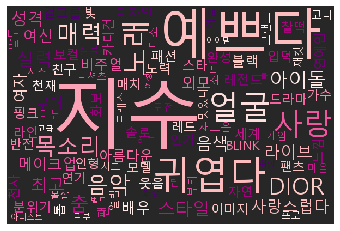

In [637]:
wc.generate_from_frequencies(dict(word_list[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/jisu_total100.png')


In [636]:
tot_ji.to_csv('./magazine/final/video_jisu_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)

In [191]:
import seaborn as sns

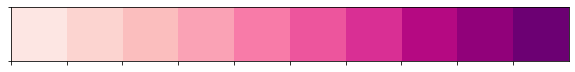

In [206]:
custom_palette = sns.color_palette("RdPu", 10)
sns.palplot(custom_palette)